In [13]:
import requests
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import requests
import numpy as np
import datetime
from chessdotcom import get_player_game_archives

In [14]:
player = 'grzegorzgatkowski'

In [15]:
data = get_player_game_archives(player).json['archives']

In [22]:
def get_games(monthly_games):
    all_months = pd.DataFrame()
    for url in monthly_games:
        if url[-7:-3]=='2022':
                response = requests.get(url).json()['games']
                all_months=pd.concat([all_months, pd.json_normalize(response, max_level=1)])
    return all_months


In [23]:
all_months = get_games(data)

In [24]:
all_months.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,time_class,...,white.rating,white.result,white.@id,white.username,white.uuid,black.rating,black.result,black.@id,black.username,black.uuid
0,https://www.chess.com/game/live/34854650199,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,1641116595,True,lB0SkA1Low!Tfo90gv8!egZRbsTCdkCsks0Tmu5QskWGjr...,9af32444-6bae-11ec-86bf-78ac4409ff3c,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,5r1k/2p3p1/2B5/pP4Kp/8/1P2R1PP/8/2b5 w - -,rapid,...,1884,resigned,https://api.chess.com/pub/player/jeroensch,jeroensch,46292e5a-36e0-11e5-801e-000000000000,1886,win,https://api.chess.com/pub/player/grzegorzgatko...,grzegorzgatkowski,ba860fa0-89e1-11e8-802e-000000000000
1,https://www.chess.com/game/live/34857652229,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,1641119617,True,mC0Kgv5QfH9RlBQBvBKBdB7TcuYIBsXPeg6XblRKstXQad...,897e487b-6bb5-11ec-86bf-78ac4409ff3c,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,2k5/p1b2ppp/8/pQp5/2N1q3/8/1P4PP/4K3 w - -,rapid,...,1886,repetition,https://api.chess.com/pub/player/grzegorzgatko...,grzegorzgatkowski,ba860fa0-89e1-11e8-802e-000000000000,1878,repetition,https://api.chess.com/pub/player/roma77astra,Roma77astra,92cc6040-ed12-11e5-8024-000000000000


In [25]:
all_months.drop([ 'url', 'pgn', 'tcn', 'uuid', 'initial_setup', 'fen', 'white.@id', 'white.uuid', 'black.@id', 'black.uuid'], axis = 1, inplace = True)

In [26]:
all_months.end_time = pd.to_datetime(all_months.end_time,unit='s')
all_months.head()

,time_control,end_time,rated,time_class,rules,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username
0,600,2022-01-02 09:43:15,True,rapid,chess,84.16,88.29,1884,resigned,jeroensch,1886,win,grzegorzgatkowski
1,600,2022-01-02 10:33:37,True,rapid,chess,NaN,NaN,1886,repetition,grzegorzgatkowski,1878,repetition,Roma77astra
2,600,2022-01-02 10:47:23,True,rapid,chess,75.69,88.14,1812,resigned,nabilsamuel,1892,win,grzegorzgatkowski
3,600,2022-01-02 12:42:30,True,rapid,chess,88.35,71.81,1898,win,grzegorzgatkowski,1797,checkmated,mairambek1964
4,600,2022-01-02 18:13:01,True,rapid,chess,NaN,NaN,1877,resigned,yuvalsadeh,1906,win,grzegorzgatkowski


In [27]:
all_months[player+"'s rating"] = np.where(all_months['white.username']==player,all_months['white.rating'],all_months['black.rating'])

In [28]:
all_months["opponent's rating"] = np.where(all_months['white.username']!=player,all_months['white.rating'],all_months['black.rating'])

In [29]:
all_months[player+" accuracy"] = np.where(all_months['white.username']==player,all_months['accuracies.white'],all_months['accuracies.black'])

In [30]:
all_months["Opponent accuracy"] = np.where(all_months['white.username']!=player,all_months['accuracies.white'],all_months['accuracies.black'])

In [31]:
all_months.head(3)

,time_control,end_time,rated,time_class,rules,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username,grzegorzgatkowski's rating,opponent's rating,grzegorzgatkowski accuracy,Opponent accuracy
0,600,2022-01-02 09:43:15,True,rapid,chess,84.16,88.29,1884,resigned,jeroensch,1886,win,grzegorzgatkowski,1886,1884,88.29,84.16
1,600,2022-01-02 10:33:37,True,rapid,chess,NaN,NaN,1886,repetition,grzegorzgatkowski,1878,repetition,Roma77astra,1886,1878,NaN,NaN
2,600,2022-01-02 10:47:23,True,rapid,chess,75.69,88.14,1812,resigned,nabilsamuel,1892,win,grzegorzgatkowski,1892,1812,88.14,75.69


In [32]:
all_months.resample('M', on = 'end_time')[['accuracies.white']].mean()

,accuracies.white
end_time,
2022-01-31,79.754167
2022-02-28,76.219796
2022-03-31,78.363611
2022-04-30,81.322088
2022-05-31,80.623333
2022-06-30,80.512791
2022-07-31,81.528182
2022-08-31,NaN
2022-09-30,76.875000


In [37]:
#all_months.resample('M', on = 'end_time')[player+"'s rating"].mean().plot()
df = all_months.groupby('time_class').resample('D', on = 'end_time')[[player+"'s rating"]].mean().reset_index()
df_wide = df.pivot("end_time", "time_class", player+"'s rating")
df_wide = df_wide.fillna(method="bfill")
df_wide = df_wide.fillna(method="ffill")
df_wide.head()


C:\Users\user\AppData\Local\Temp\ipykernel_16664\1489343179.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_wide = df.pivot("end_time", "time_class", player+"'s rating")


time_class,blitz,bullet,rapid
end_time,,,
2022-01-02,1933.352941,1316.555556,1893.6
2022-01-03,1933.352941,1316.555556,1911.0
2022-01-04,1891.774194,1316.555556,1911.0
2022-01-05,1856.000000,1316.555556,1911.0
2022-01-06,1856.000000,1316.555556,1902.6


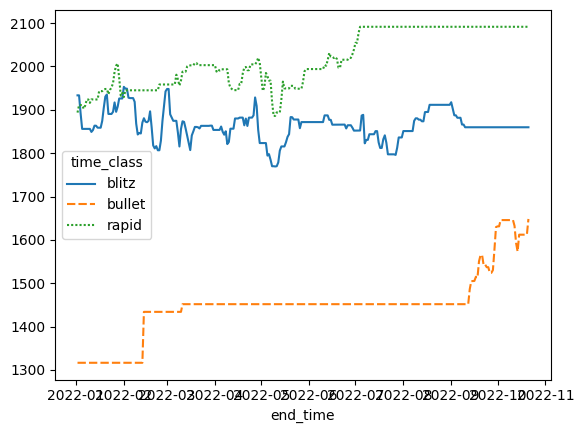

In [38]:
fig = sns.lineplot(data=df_wide)

In [ ]:
ax , fig = plt.subplots(nrows=1, ncols=1)

In [ ]:
sns.histplot(data=all_months, x = player+"'s rating'")

In [ ]:
all_months_rapid = all_months[all_months.time_class=='rapid']
sns.histplot(data=all_months_rapid, x = "opponent's rating'", hue = 'time_class')

In [ ]:
all_months_blitz = all_months[all_months.time_class=='blitz']
sns.histplot(data=all_months_blitz, x = "opponent's rating'", hue = 'time_class')

In [ ]:
sns.histplot(data=all_months, x = "opponent's rating'", hue = 'time_class')

In [ ]:
a = response = requests.get(data[0]).json()['games']

In [ ]:
has_records = any(all_months['end_time'])

In [ ]:
has_records

In [ ]:
all_months.end_time.count()

In [ ]:
all_months.groupby('time_class').end_time.count()['blitz']

In [ ]:
all_months[all_months.time_class == 'daily'].shape[0]

In [ ]:
sns.countplot(data=all_months, y ='white.result')

In [ ]:
all_months['accuracies.white'].count()

In [ ]:
sns.relplot(data=all_months, x = player+" accuracy", y = 'Opponent accuracy', col = 'time_class', kind = 'scatter')

In [ ]:
print(data)